In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [5]:
File_path_read = 'C:/Users/mu457181/Desktop/data_incubator/project proposal/Smaller_dataset.csv'

table = pd.read_csv(File_path_read)

table[table.columns[1:]].head()


,Y,OBJECTID,REQUESTID,WORKORDERID,CSRNUMBER,DESCRIPTION,STATUS,REQUESTCATEGORY,INITIATEDDATE,CLOSEDDATE,...,XCOORD,YCOORD,ONSEGX,ONSEGY,UPDATEDATE,LONGITUDE,LATITUDE,SQUARE,SUFFIX,LOT
0,38.856470,784875,1905270,NaN,18-00059452,TRAFFIC SAFETY,Closed,Safety Standards Division,2018-02-02T14:08:20.000Z,2018-02-07T15:10:31.000Z,...,400932.800,132072.30,400932.8000,132072.3000,2018-02-07T00:00:00.000Z,-76.989253,38.856462,NaN,NaN,NaN
1,38.877728,784876,1905271,632090.0,18-00059454,Streetlight Repair,Closed,Streetlight Operations Division,2018-02-02T14:08:38.000Z,2018-02-06T02:31:16.000Z,...,401400.660,134432.11,401418.5387,134432.2146,2018-02-06T00:00:00.000Z,-76.983652,38.877720,NaN,NaN,NaN
2,38.876450,784877,1905272,NaN,18-00059455,Potholes,Closed,Street and Bridge Maintenance Field Operations,2018-02-02T14:08:46.000Z,2018-03-09T09:04:34.000Z,...,406033.675,134292.54,406033.6752,134292.5398,2018-03-09T00:00:00.000Z,-76.930466,38.876443,NaN,NaN,NaN
3,38.905629,784878,1905273,643331.0,18-00059459,Roadway Sign,Closed,TOA-S&M,2018-02-02T14:09:32.000Z,2018-10-09T15:41:55.000Z,...,402324.880,137529.62,402324.8800,137529.6200,2018-10-09T00:00:00.000Z,-76.973196,38.905621,NaN,NaN,NaN
4,38.952941,784879,1905275,NaN,18-00059467,TRAFFIC SIGNAL ISSUE,Closed,Transportation Management Center,2018-02-02T14:10:52.000Z,2018-02-09T17:37:27.000Z,...,393925.570,142783.67,393945.9192,142783.6678,2018-02-09T00:00:00.000Z,-77.069844,38.952933,NaN,NaN,NaN


In [6]:
df_x = table['DESCRIPTION']
print(df_x)

0            TRAFFIC SAFETY
1        Streetlight Repair
2                  Potholes
3              Roadway Sign
4      TRAFFIC SIGNAL ISSUE
5      TRAFFIC SIGNAL ISSUE
6              Tree Pruning
7     Parking Meter Request
8             Tree Planting
9           Tree Inspection
10             Roadway Sign
11             Tree Removal
12          Tree Inspection
13             Tree Removal
14             Tree Removal
15             Tree Removal
16       Streetlight Repair
17                 Potholes
18                 Potholes
19       Streetlight Repair
20          Tree Inspection
21                 Potholes
22     TRAFFIC SIGNAL ISSUE
23                 Potholes
24                 Potholes
25    Parking Meter Request
26                 Potholes
27                 Potholes
28                 Potholes
29       Streetlight Repair
30            Tree Planting
31       Streetlight Repair
32       Streetlight Repair
33     TRAFFIC SIGNAL ISSUE
Name: DESCRIPTION, dtype: object


In [7]:
len(df_x)

34

In [8]:

df_x_mod = []

for x in df_x:
    x_mod = x.lower()
    df_x_mod.append(x_mod)

print(df_x_mod)    

['traffic safety', 'streetlight repair', 'potholes', 'roadway sign', 'traffic signal issue', 'traffic signal issue', 'tree pruning', 'parking meter request', 'tree planting', 'tree inspection', 'roadway sign', 'tree removal', 'tree inspection', 'tree removal', 'tree removal', 'tree removal', 'streetlight repair', 'potholes', 'potholes', 'streetlight repair', 'tree inspection', 'potholes', 'traffic signal issue', 'potholes', 'potholes', 'parking meter request', 'potholes', 'potholes', 'potholes', 'streetlight repair', 'tree planting', 'streetlight repair', 'streetlight repair', 'traffic signal issue']


In [9]:
cv1 = TfidfVectorizer(min_df=1,stop_words='english')

In [10]:
x_traincv=cv1.fit_transform(df_x_mod)

In [13]:
feature_vec=x_traincv.toarray()

In [14]:
feature_vec

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.81324781, 0.        , 0.        , 0.        ,
        0.58191752, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.70710678, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70710678, 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.58925044, 0.        , 0.      

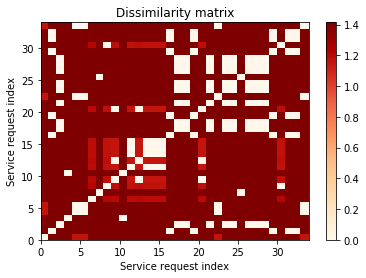

In [29]:
from scipy.spatial.distance import squareform
from sklearn import datasets

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt


dist_mat = squareform(pdist(feature_vec))
N = len(feature_vec)

plt.pcolormesh(dist_mat,cmap="OrRd")
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.xlabel('Service request index')
plt.ylabel('Service request index')
plt.title('Dissimilarity matrix')
plt.show()

Method:	 ward


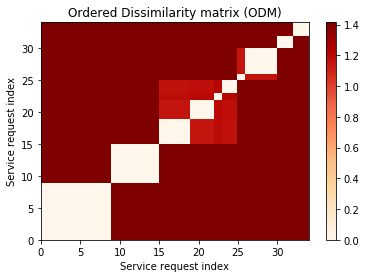

In [31]:
def seriation(Z,N,cur_index):

    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):

    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

methods = ["ward"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat,cmap="OrRd")
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.colorbar()
    plt.xlabel('Service request index')
    plt.ylabel('Service request index')
    plt.title('Ordered Dissimilarity matrix (ODM)')
    plt.show()

In [16]:
cv1.get_feature_names()

['inspection',
 'issue',
 'meter',
 'parking',
 'planting',
 'potholes',
 'pruning',
 'removal',
 'repair',
 'request',
 'roadway',
 'safety',
 'sign',
 'signal',
 'streetlight',
 'traffic',
 'tree']

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='average')  
table["Cluster # Assigned"] = cluster.fit_predict(feature_vec)  
print(table["cluster"])

0     0
1     2
2     3
3     5
4     0
5     0
6     6
7     4
8     7
9     1
10    5
11    1
12    1
13    1
14    1
15    1
16    2
17    3
18    3
19    2
20    1
21    3
22    0
23    3
24    3
25    4
26    3
27    3
28    3
29    2
30    7
31    2
32    2
33    0
Name: cluster, dtype: int64


In [26]:
WO_data = table[["OBJECTID", "DESCRIPTION","Cluster # Assigned"]]
        #print(Building_clusters)

df = pd.DataFrame(WO_data)

File_path_write = 'C:/Users/mu457181/Desktop/data_incubator/project proposal//Clustering_results.xlsx'

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(File_path_write, engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Clustering')

# Close the Pandas Excel writer and output the Excel file.
writer.save() 